In [1]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading & Reading datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [3]:
transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [9]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [10]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
transactions.duplicated().sum()

np.int64(0)

In [12]:
customers.duplicated().sum()

np.int64(0)

In [13]:
products.duplicated().sum()

np.int64(0)

## No Missing Values and Duplicate Values found in the any datasets

In [14]:
# Converting date columns to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


# Descriptice Statistics

In [17]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [18]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [19]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


# Merging the datasets

In [20]:
merged_data = pd.merge(transactions, products, on='ProductID', how='left')
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='left')

# 1. Total sales by region

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_18048\2719332290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")


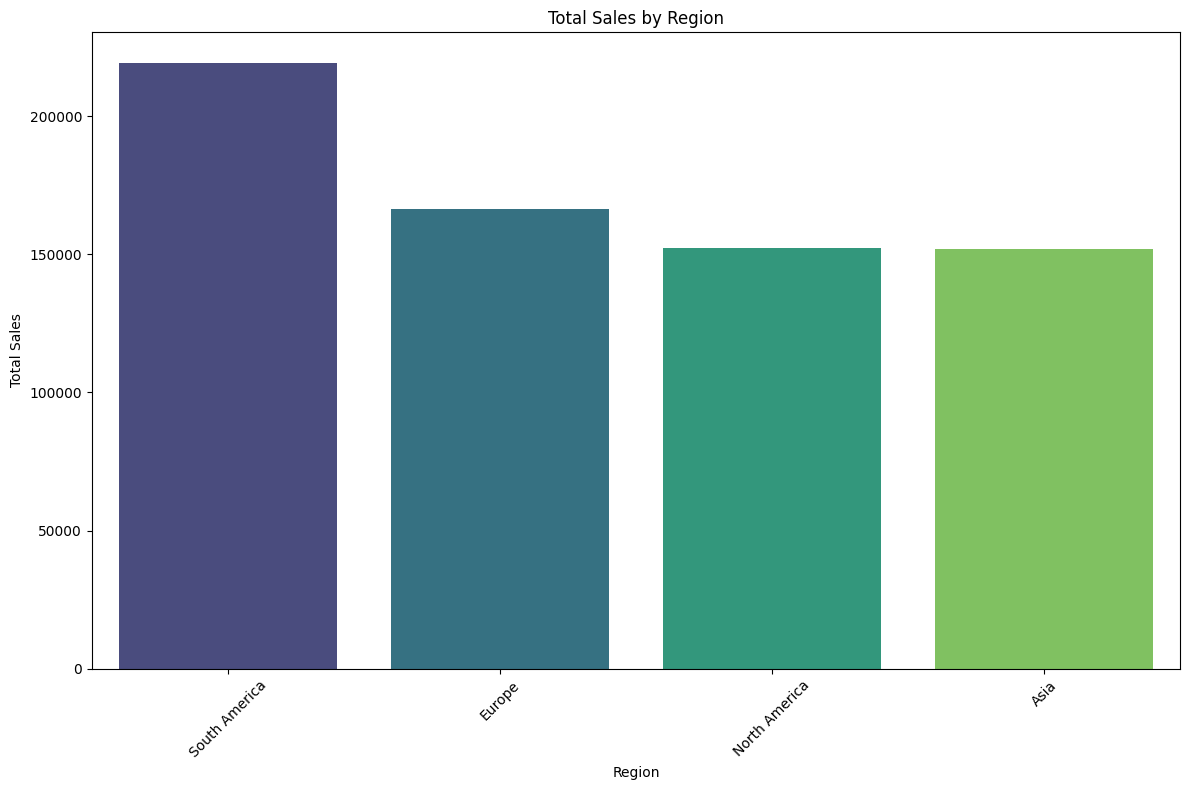

In [22]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette="viridis")
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_region.png')

# 2. Most popular product categories

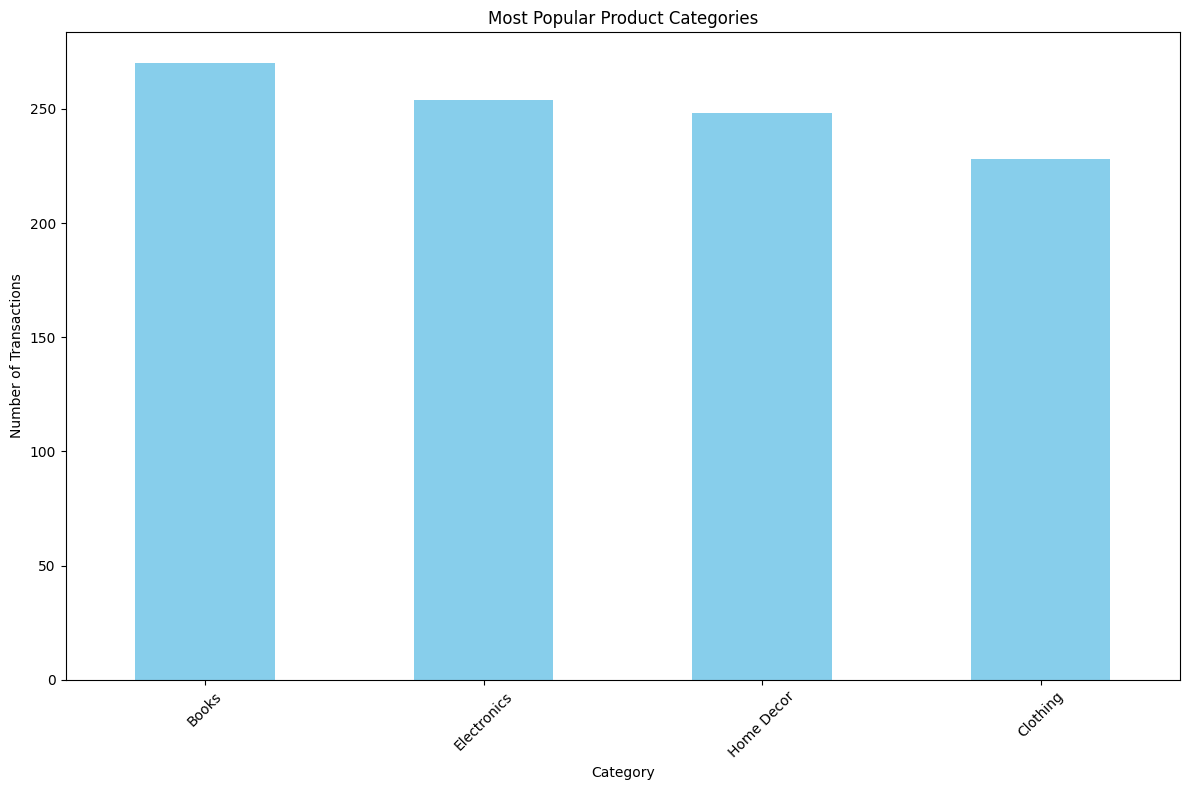

In [23]:
popular_categories = merged_data['Category'].value_counts()

plt.figure(figsize=(12, 8))
popular_categories.plot(kind='bar', color='skyblue')
plt.title('Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('popular_categories.png')


# 3. Customer signup trends vs time

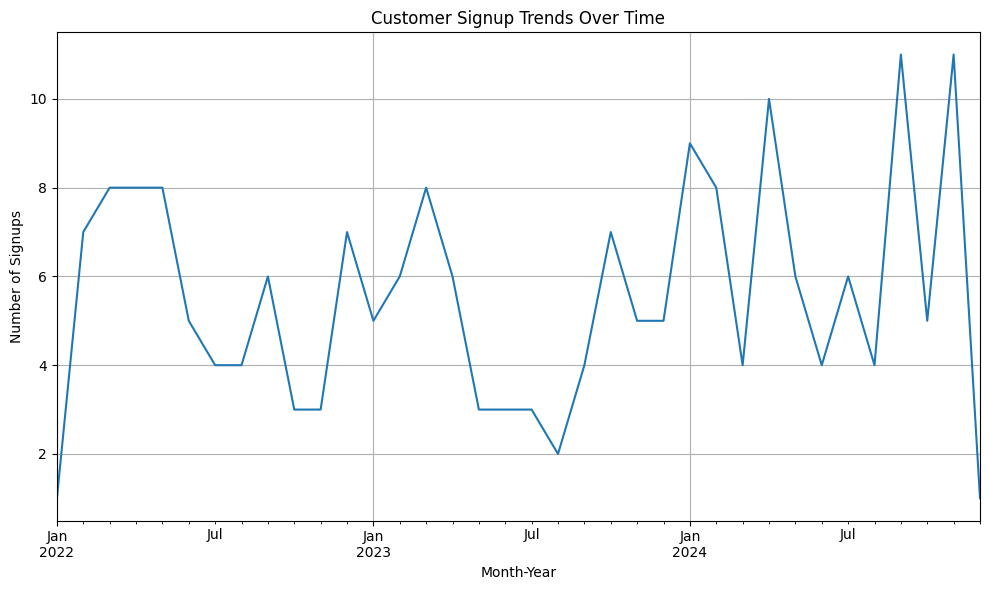

In [24]:
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 6))
signup_trends.plot()
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.grid()
plt.tight_layout()
plt.savefig('signup_trends.png')

# 4. Revenue trends over time

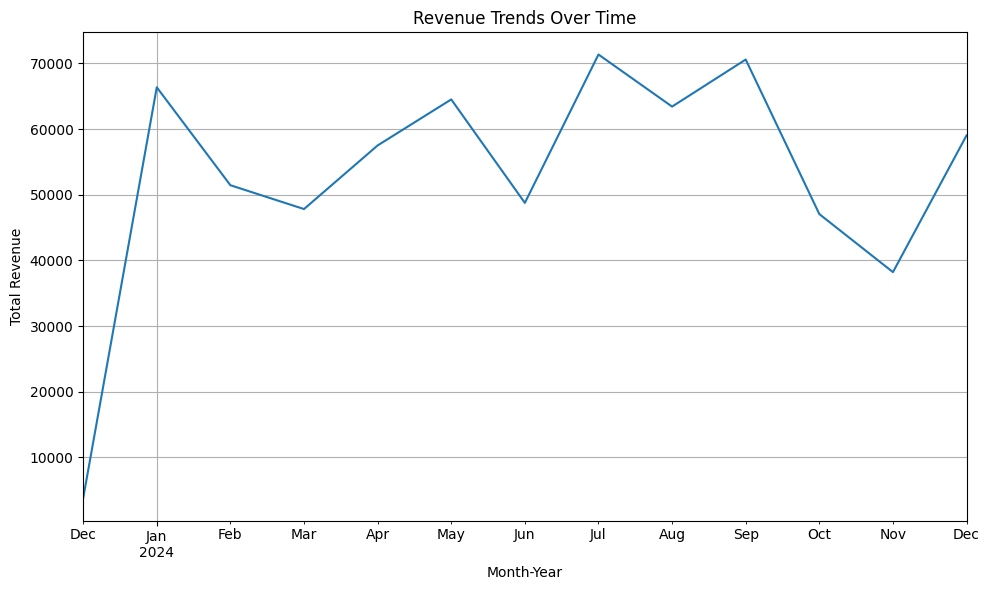

In [25]:
revenue_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(10, 6))
revenue_trends.plot()
plt.title('Revenue Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.grid()
plt.tight_layout()
plt.savefig('revenue_trends.png')

# 5. Top customers by spending

In [26]:
top_customers = merged_data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers

CustomerID  CustomerName        
C0141       Paul Parsons            10673.87
C0054       Bruce Rhodes             8040.39
C0065       Gerald Hines             7663.70
C0156       William Adams            7634.45
C0082       Aimee Taylor             7572.91
C0188       Anna Ball                7111.32
C0059       Mrs. Kimberly Wright     7073.28
C0028       Jennifer Pena            6819.57
C0099       Rodney Eaton             6715.72
C0165       Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64